# Multiple Linear Regression

In this notebook, we will continue practicing:

- How to perform regression with multiple variables
- How to handle categorical variables in regression
- How to evaluate and compare models to determine the best one


## imports

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data manipulation and processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # more attractive visualizations
import statsmodels.api as sm  # will help us apply regression model
from scipy.stats import spearmanr, pearsonr, chi2_contingency

# Getting the Data

In [2]:
#https://www.kaggle.com/datasets/gauravduttakiit/real-estate-price/data
property_dataset = pd.read_csv("real_estate_price_size_year_view.csv")
property_dataset.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [3]:
#exmplain of all columns
#Price: The selling price of the property.
#Size: The size of the property in square feet.
#Year: The year the property was built.
#View: if the property has a Sea view or not.

## What is the size of the dataset?

In [4]:
#size of dataset
len(property_dataset)

100

## Get insights about the data using descriptive statistics.

In [5]:
#describe dataset
property_dataset.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [6]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


## Which numeric features are correlated with each other?

<Axes: >

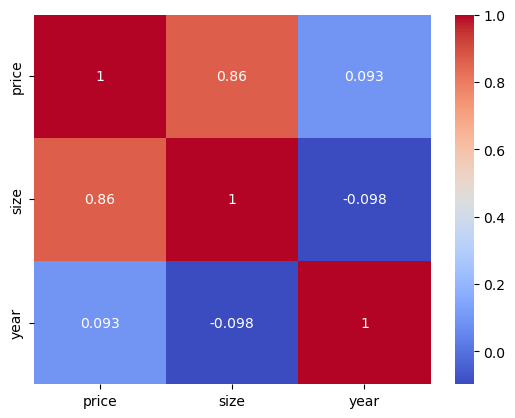

In [7]:
sns.heatmap(property_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Based on the correlation matrix, which features seem to be most correlated with the target variable (price)?

In [8]:
#property_dataset only with numeric columns
numeric_cols = property_dataset.select_dtypes(include=[np.number])
# lets analyze the correlations of it sorted
numeric_cols.corr()['size'].sort_values(ascending=False)

size     1.000000
price    0.862983
year    -0.097678
Name: size, dtype: float64

## What is the type of the "view" column? and how many unique values does it have?

In [9]:
#how balanced is the view column
property_dataset['view'].value_counts()

view
No sea view    51
Sea view       49
Name: count, dtype: int64

## For work with view column we need to convert it to binary values. Convert the "view" using .map() function so that "Sea view" is represented as 1 and "No sea view" as 0.

In [10]:
#replace the view column with binary values
property_dataset['view'] = property_dataset['view'].map({'Sea view': 1, 'No sea view': 0})
property_dataset.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


# Fit regression model

## For starting, let's create a regression model using only the "size" feature to predict the "price". First create scatter plot to visualize the relationship between size and price.

In [11]:
#imagine we want to predict price based on size
X = property_dataset['size']
y = property_dataset['price']

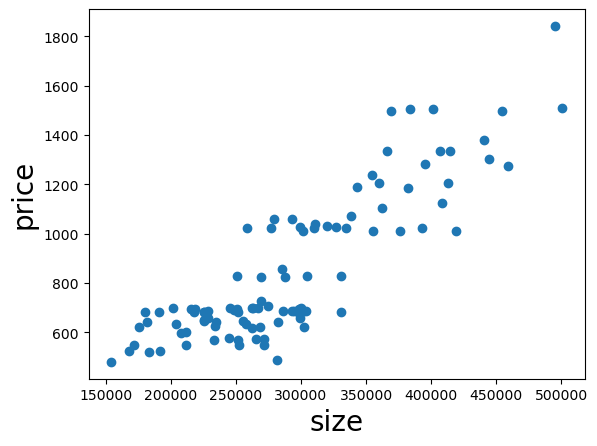

In [12]:
plt.scatter(y, X)
plt.xlabel("size", fontsize = 20)
plt.ylabel("price", fontsize = 20)
plt.show()

## Based on the scatter plot, does there appear to be a relationship between size and price?

In [ ]:
# there is a high positive correlation between size and price

## Calculate the Spearman and Pearson correlation coefficients between size and price. What do these coefficients indicate about the relationship between these two variables?

In [13]:
#calculate spearman correlation with pvalue
corr, pvalue = spearmanr(property_dataset['size'], property_dataset['price'])
print("Spearman correlation: ", corr)
print("P-value: ", pvalue)

Spearman correlation:  0.7994862084711543
P-value:  2.029248670485123e-23


In [14]:
#calculate pearson correlation with pvalue
corr, pvalue = pearsonr(property_dataset['size'], property_dataset['price'])
print("Pearson correlation: ", corr)
print("P-value: ", pvalue)

Pearson correlation:  0.86298272670127
P-value:  8.127632219790004e-31


## Now, let's create a linear regression model using "size" as the independent variable to predict "price". Use the statsmodels library to fit the model and display the summary of the regression results.

In [15]:
#regression model
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           8.13e-31
Time:                        17:39:59   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.0

## From previous class we already know about r-squared. What is the R-squared value of this model and what does it indicate about the model's performance?

In [ ]:
# The R-squared value of this model is 0.745, which indicates that approximately 74.5% of the variance in the price can be explained by the size of the property.

## Lets try to evaluate the model using RMSE (Root Mean Squared Error). Calculate the RMSE for this regression model.

In [16]:
#calculate RMSE
predictions = model.predict(X)
#formula
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print("RMSE: ", rmse)

# RMSE means Root Mean Squared Error
# This metric gives us an idea of how much our model's predictions deviate from the actual values on average.
# A lower RMSE indicates a better fit, as it means the predictions are closer to the actual values.
# We need always compare RMSE with the mean of the target variable to understand how significant the error is in context.

RMSE:  38733.9735718257


## Compare RMSE to the mean price of the properties in the dataset. What does this comparison tell you about the model's predictive accuracy?

In [17]:
#what RMSE means in this context
mean_price = np.mean(y)
print("Mean price: ", mean_price)
print("RMSE as percentage of mean price: ", (rmse / mean_price) * 100, "%")

Mean price:  292289.47015999997
RMSE as percentage of mean price:  13.251922332550203 %


# Second regression model with categorical variable

## Does having a sea view impact the price of the property? Let's investigate this by incorporating the "view" feature into our regression model. Use the chi-squared test to determine if there is a significant association between "view" and "price".

In [18]:
#calculate chi2 for view and price
contingency_table = pd.crosstab(property_dataset['view'], property_dataset['price'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi2: ", chi2)
print("P-value: ", p)

Chi2:  99.99999999999997
P-value:  0.4529585113209321


## Chi-squared is enough for determine if there is association between categorical and numeric variable?

In [ ]:
# no, it is indicated for categorical x categorical

## Create a new regression model that includes both "size" and "view" as independent variables to predict "price". Fit the model using statsmodels and display the summary of the regression results.

In [19]:
#lets add view to the regression model
X = property_dataset[['size', 'view']]
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           2.44e-46
Time:                        17:39:59   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.0

## Compare the R-squared value of this new model with the previous model that only included "size". How does the inclusion of "view" affect the model's performance?

In [20]:
#how big is rsquared improvement
#before .745
#after .885

## Use also RMSE to evaluate this new model. Interpret the results.

In [21]:
#how about RMSE
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print("RMSE with view: ", rmse)

RMSE with view:  25963.243677355375


In [22]:
#what RMSE means in this context
mean_price = np.mean(y)
print("Mean price: ", mean_price)
print("RMSE as percentage of mean price: ", (rmse / mean_price) * 100, "%")

Mean price:  292289.47015999997
RMSE as percentage of mean price:  8.882716049655512 %


In [23]:
#this model is better than previeous one

## Interpret the coefficient of the "view" variable in the context of the model. What does this coefficient tell you about the impact of having a sea view on the price of the property?

In [24]:
#in this case having a sea view means 57560 higher price on average

# Third regression model with all features

## Create a final regression model that includes all three features: "size", "view", and "year". Fit the model using statsmodels and display the summary of the regression results.

In [25]:
#now create a model with all features
X = property_dataset[['size', 'view', 'year']]
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.02e-50
Time:                        17:39:59   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.0

## is this model better than the previous two models? Justify your answer using R-squared and RMSE.

In [26]:
#this is better

#the diference of R-squared
#model1 .745
#model2 .885
#model3 .913

In [27]:
#how about RMSE
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))
print("RMSE with view: ", rmse)

RMSE with view:  22630.753896978447


In [28]:
#what RMSE means in this context
mean_price = np.mean(y)
print("Mean price: ", mean_price)
print("RMSE as percentage of mean price: ", (rmse / mean_price) * 100, "%")

Mean price:  292289.47015999997
RMSE as percentage of mean price:  7.742582681678652 %


## Interpret the coefficients of all variables in the context of the model. What do these coefficients tell you about the impact of each feature on the price of the property? Create the final equation for predicting price based on size, view, and year.

In [29]:
#final equation
# price = -5.398×10^6 + 223.03 * size + 56.73 * view + 2718.95 * year